# デモプログラム
## 対数ガウスカーネルのロジスティック回帰

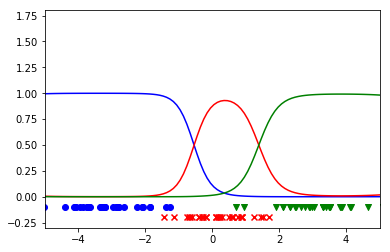

In [4]:
import numpy as np
import matplotlib

%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(1)


def generate_data(sample_size, n_class):
    x = (np.random.normal(size=(sample_size // n_class, n_class))
         + np.linspace(-3., 3., n_class)).flatten()
    y = np.broadcast_to(np.arange(n_class),
                        (sample_size // n_class, n_class)).flatten()
    return x, y


def sga_with_replacement(x, y, h, lr, n_class):
    sample_size = len(x)
    theta = np.random.normal(size=(sample_size, n_class))

    for i in range(sample_size * 10 ** 3):
        theta_prev = theta.copy()
        idx = np.random.randint(0, sample_size)

        phi_x = np.exp(-(x - x[idx]) ** 2 / (2 * h ** 2))
        logit = phi_x.dot(theta)
        # subtracting mean for numerical stability
        unnormalized_prob = np.exp(logit - np.max(logit))
        prob = unnormalized_prob / unnormalized_prob.sum()
        gtheta = -prob * phi_x[:, None] + np.where(
            np.arange(n_class) == y[idx], 1., 0.) * phi_x[:, None]
        theta += lr * gtheta
        if np.linalg.norm(theta - theta_prev) < 1e-3:
            break

    return theta


def visualize(x, y, theta, h):
    X = np.linspace(-5., 5., num=100)
    K = np.exp(-(x - X[:, None]) ** 2 / (2 * h ** 2))

    plt.clf()
    plt.xlim(-5, 5)
    plt.ylim(-.3, 1.8)
    logit = K.dot(theta)
    unnormalized_prob = np.exp(logit - np.max(logit, axis=1, keepdims=True))
    prob = unnormalized_prob / unnormalized_prob.sum(1, keepdims=True)

    plt.plot(X, prob[:, 0], c='blue')
    plt.plot(X, prob[:, 1], c='red')
    plt.plot(X, prob[:, 2], c='green')

    plt.scatter(x[y == 0], -.1 * np.ones(len(x) // 3), c='blue', marker='o')
    plt.scatter(x[y == 1], -.2 * np.ones(len(x) // 3), c='red', marker='x')
    plt.scatter(x[y == 2], -.1 * np.ones(len(x) // 3), c='green', marker='v')




xs, ys = generate_data(sample_size=90, n_class=3)
theta = sga_with_replacement(xs, ys, h=2., lr=.1, n_class=3)
visualize(xs, ys, theta, h=2.)

# 最小二乗確率的分類の実装
## ガウスカーネル

In [5]:
from models.least_square_probablistic_classifier import LeastSquareProbabilisticGaussKernelClassifier

model = LeastSquareProbabilisticGaussKernelClassifier(width=2, n_class=3, l2_regularization=0.01)
model.fit(xs.reshape(-1, 1), ys)

100%|██████████| 90/90 [00:00<00:00, 21781.05it/s]


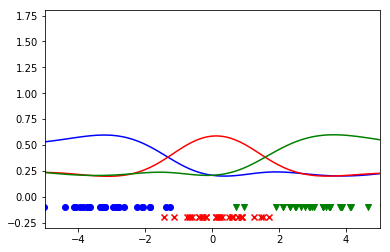

In [6]:
visualize(xs, ys, model.parameter.T, h=2)